In [6]:
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

We dropped ~15 columns in a previous version based on our needs.

In [7]:
data = pd.read_csv('./Coffee_dataset_cleaned_column.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: './Coffee_dataset_cleaned_column.csv'

# Dropping lines
with 0 values

In [ ]:
data.loc[data['Total.Cup.Points']==0]

,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1310,1310,1311,Arabica,bismarck castro,Honduras,los hicaques,cigrah s.a de c.v,comayagua,Instituto Hondureño del Café,2017,"April 28th, 2017",Bismarck Castro,Caturra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,Green,Instituto Hondureño del Café,1400.0


In [ ]:
data = data.drop(data[data['ID']==1311].index)

In [ ]:
data.loc[data['Total.Cup.Points']==0]

,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1339 non-null   int64  
 1   ID                    1339 non-null   int64  
 2   Species               1339 non-null   object 
 3   Owner                 1332 non-null   object 
 4   Country.of.Origin     1338 non-null   object 
 5   Farm.Name             980 non-null    object 
 6   Company               1130 non-null   object 
 7   Region                1280 non-null   object 
 8   In.Country.Partner    1339 non-null   object 
 9   Harvest.Year          1292 non-null   object 
 10  Grading.Date          1339 non-null   object 
 11  Owner.1               1332 non-null   object 
 12  Variety               1138 non-null   object 
 13  Processing.Method     1169 non-null   object 
 14  Aroma                 1339 non-null   float64
 15  Flavor               

# Lignes à dropper ? 

In [ ]:
data.isna().sum()

ID                        0
Species                   0
Owner                     7
Country.of.Origin         1
Farm.Name               359
Company                 209
Region                   59
Producer                232
In.Country.Partner        0
Harvest.Year             47
Grading.Date              0
Owner.1                   7
Variety                 226
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Total.Cup.Points          0
Moisture                  0
Color                   270
Certification.Body        0
altitude_mean_meters    230
dtype: int64

There is no missing values in our features (aromatic profile), missing values are only in the output details.

Do we accept that sometimes our application will return some missing informations in the technical list of top-recommended coffee ? (I think yes)

Redondant imformations among [Farm.Name, Company, Producer, Owner.1] -> We keep Owner.1, Farm.Name and Company. We drop producer. Farm.Name is the most requested features on a coffee bag but it has a significant amount of NAs, so we can deal with this issue with : 'If data[Farm.Name] is NA, print(data[Company]), something like that.



In [ ]:
# This means that it never happens that Farm.Name and Company are both missing. So we can print FarmName by default in the ouptut and Company as a replacement when FarmName is missing. 
data[['Farm.Name', 'Company']].isna().all().sum()

0

In [ ]:
# There is no rows with NA in all columns
data.isna().all(axis=1).sum()

0

In [ ]:
data.drop('Producer', axis=1, inplace=True)

# Aberrant values in Altitude
Coffee typically grows between 1km - 2km above sea level. Some highest recorded altitudes are 2500-3000. Highest point on earth is 8849.

In [ ]:
px.histogram(data, 'altitude_mean_meters')

Based on available knowledge + our dataset, we can consider any altitude above 4000m to be outlier. But first, make sure conversion from imperial to metrics was done on these values.

In [ ]:
# dataframe with all ok altitudes
cond_ok = data['altitude_mean_meters'] < 4000
alt_ok = data[cond_ok]

# dataframe with aberrant altitude values
cond_outlier = data['altitude_mean_meters'] >= 4000
alt_weird = data[cond_outlier]
alt_weird

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1098,1099,Arabica,u htun htun,Myanmar,thein kone,NaN,ywar ngan,Coffee Quality Institute,2014,"July 17th, 2015",U Htun Htun,Catuai,Natural / Dry,7.42,7.0,7.08,7.0,7.17,7.33,10.0,10.0,10.0,80.25,0.0,Green,Coffee Quality Institute,4287.0


We have only 6 aberrant altitudes, so let's have a closer look and correct them instead of dropping the rows !

Fazenda pantano is 1150m altitude whereas it is 11000m is the dataset, we suggest 'fatfinger' issue here and correct the value to 1100.0
wat-ka-bu and thein kone have altitudes of ~4000m, but the altitude is actually ~1200m in google maps for this region. When we check the dataset, unit_of_measurements was 'm' but 4000ft actually = 1200m. So we suspect there was an error in unit_of_measurment that prevented the conversion to happen for these farms from the same region. We then convert ~4000ft in m = ~1200m.
La esperanza has two aberrant altitudes at 190164.0m, real altitude is 1900m
cafetales san matilde 110000 ! Correct issue is actually 1100.o

In [ ]:
data.loc[data['ID']==544, 'altitude_mean_meters'] = 1100
data.loc[data['ID']==544]

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
543,544,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,expocaccer,cerrado,Brazil Specialty Coffee Association,2014/2015,"August 15th, 2014",Expocaccer Coop dos Cafeic do Cerrado Ltda,Moka Peaberry,Semi-washed / Semi-pulped,7.08,7.5,7.5,7.83,7.75,7.67,10.0,10.0,10.0,82.92,0.11,Green,Brazil Specialty Coffee Association,1100.0


In [ ]:
data.loc[data['ID'].isin([841, 1098, 1099]), 'altitude_mean_meters'] = [1220, 1306.7, 1306.7]
data.loc[data['ID'].isin([841, 1098, 1099])]

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
840,841,Arabica,u mg mg,Myanmar,wat-ka-bu,NaN,ywar ngan,Coffee Quality Institute,2015,"July 17th, 2015",U Mg Mg,Catuai,Washed / Wet,7.33,7.58,7.50,7.42,7.33,7.33,10.0,10.0,10.0,81.83,0.00,Green,Coffee Quality Institute,1220.0
1097,1098,Arabica,bob mccauley,Myanmar,waylead farms,"waylead industrial co, ltd.","yauk sauk, shan state",Specialty Coffee Association,2015,"August 27th, 2015",Bob McCauley,Other,Natural / Dry,8.00,7.08,7.00,7.33,7.08,6.92,10.0,10.0,10.0,80.25,0.11,Green,Specialty Coffee Association,1306.7
1098,1099,Arabica,u htun htun,Myanmar,thein kone,NaN,ywar ngan,Coffee Quality Institute,2014,"July 17th, 2015",U Htun Htun,Catuai,Natural / Dry,7.42,7.00,7.08,7.00,7.17,7.33,10.0,10.0,10.0,80.25,0.00,Green,Coffee Quality Institute,1306.7


In [ ]:
data.loc[data['ID'].isin([897, 1145]), 'altitude_mean_meters'] = [1900, 1900]
data.loc[data['ID'].isin([897, 1145])]

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
896,897,Arabica,juan luis alvarado romero,Guatemala,la esperanza,"unex guatemala, s.a.",huehuetenango,Asociacion Nacional Del Café,2017,"June 1st, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.42,7.42,7.08,7.50,7.42,7.33,10.00,10.00,10.00,81.58,0.12,Green,Asociacion Nacional Del Café,1900.0
1144,1145,Arabica,juan luis alvarado romero,Guatemala,la esperanza,"unex guatemala, s.a.",oriente,Asociacion Nacional Del Café,2016,"June 22nd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.50,7.42,7.25,7.58,7.33,7.42,9.33,9.33,9.33,79.75,0.10,Green,Asociacion Nacional Del Café,1900.0


In [ ]:
data.loc[data['ID']==1041, 'altitude_mean_meters'] = 1100
data.loc[data['ID']==1041]

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1040,1041,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,cafetales santa matilde,"comercial internacional exportadora, s.a.",jinotega,Asociación de Cafés Especiales de Nicaragua,2015,"May 28th, 2015","COMERCIAL INTERNACIONAL EXPORTADORA, S.A.",Other,Washed / Wet,7.25,7.25,7.17,7.25,7.33,7.25,10.0,10.0,10.0,80.75,0.12,Green,Asociación de Cafés Especiales de Nicaragua,1100.0


In [ ]:
px.histogram(data, 'altitude_mean_meters')

# Fill varieties of Robusta
Most coffee from data['Species']==Robusta have NA or 'others' etc. Because Varieties in botanic is actually sub-species, annd that we only have 28 Robusta we can fill data['Variety']=Robusta for all data['Species']==Robusta

In [ ]:
rob_cond = data['Species']=='Robusta'
data_rob = data[rob_cond]
data_rob['ID'].count()

28

In [ ]:
data_rob['Variety'].isna().sum()

25

In [ ]:
data_rob['Variety'].value_counts()

Variety
Other     2
Arusha    1
Name: count, dtype: int64

Arusha is not a valid Robusta variety, so we will replace this by 'Robusta'

In [ ]:
data.loc[data['Species']== 'Robusta', 'Variety'] = 'Robusta'
data.loc[data['Species']== 'Robusta']

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1311,1312,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,ankole coffee producers coop,sheema south western,Uganda Coffee Development Authority,2013,"June 26th, 2014",Ankole coffee producers coop,Robusta,NaN,7.83,8.08,7.75,7.92,8.25,7.92,10.00,10.00,8.00,83.75,0.12,Green,Uganda Coffee Development Authority,1488.0
1312,1313,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,kaapi royale,chikmagalur karnataka indua,Specialty Coffee Association,2017,"October 31st, 2017",Nishant Gurjer,Robusta,Washed / Wet,8.00,7.75,7.92,8.00,7.92,7.92,10.00,10.00,8.00,83.50,0.00,NaN,Specialty Coffee Association,3170.0
1313,1314,Robusta,andrew hetzel,India,sethuraman estate,sethuraman estate,chikmagalur,Specialty Coffee Association,2015,"April 30th, 2015",Andrew Hetzel,Robusta,NaN,7.92,7.83,7.92,8.00,7.83,7.92,10.00,10.00,7.83,83.25,0.00,Green,Specialty Coffee Association,1000.0
1314,1315,Robusta,ugacof,Uganda,ugacof project area,ugacof ltd,central,Uganda Coffee Development Authority,2013,"July 14th, 2014",UGACOF,Robusta,NaN,8.00,7.92,7.92,7.75,7.83,7.75,10.00,10.00,7.75,83.00,0.12,Green,Uganda Coffee Development Authority,1212.0
1315,1316,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,katuka development trust ltd,luwero central region,Uganda Coffee Development Authority,2013,"June 26th, 2014",Katuka Development Trust Ltd,Robusta,NaN,8.33,7.83,7.83,7.75,8.25,7.75,10.00,10.00,7.58,83.00,0.12,Green,Uganda Coffee Development Authority,1250.0
1316,1317,Robusta,andrew hetzel,India,NaN,"cafemakers, llc",chikmagalur,Specialty Coffee Association,2012,"February 29th, 2012",Andrew Hetzel,Robusta,NaN,8.00,7.92,7.67,8.00,7.75,7.92,10.00,10.00,7.75,82.75,0.00,Green,Specialty Coffee Association,3000.0
1317,1318,Robusta,andrew hetzel,India,sethuraman estates,cafemakers,chikmagalur,Specialty Coffee Association,2014,"May 15th, 2014",Andrew Hetzel,Robusta,NaN,7.67,7.75,7.83,7.83,7.92,7.75,10.00,10.00,8.00,82.58,0.00,Green,Specialty Coffee Association,750.0
1318,1319,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,kaapi royale,chikmagalur karnataka india,Specialty Coffee Association,2017,"October 25th, 2017",Nishant Gurjer,Robusta,Washed / Wet,7.67,7.75,7.83,7.67,7.92,7.83,10.00,10.00,7.92,82.50,0.10,Bluish-Green,Specialty Coffee Association,3140.0
1319,1320,Robusta,nishant gurjer,India,sethuraman estate,kaapi royale,chikmagalur karnataka,Specialty Coffee Association,2015,"August 17th, 2016",Nishant Gurjer,Robusta,Washed / Wet,7.67,7.75,7.58,7.83,7.83,8.00,10.00,10.00,7.92,82.50,0.09,Green,Specialty Coffee Association,1000.0
1320,1321,Robusta,ugacof,Uganda,ishaka,ugacof ltd,western,Uganda Coffee Development Authority,2014,"August 5th, 2014",UGACOF,Robusta,NaN,7.67,7.83,7.83,7.83,7.92,7.75,10.00,10.00,7.75,82.42,0.12,Green,Uganda Coffee Development Authority,1100.0


## Save the cleaned Dataframe

In [ ]:
# data.to_csv('Coffee_dataset_cleaned_column_and_rows.csv')

# Colinearity

In [ ]:
data = pd.read_csv('./Coffee_dataset_cleaned_column_and_rows.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
0,0,0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0
1,1,1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0
2,2,2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0
3,3,3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0
4,4,4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0


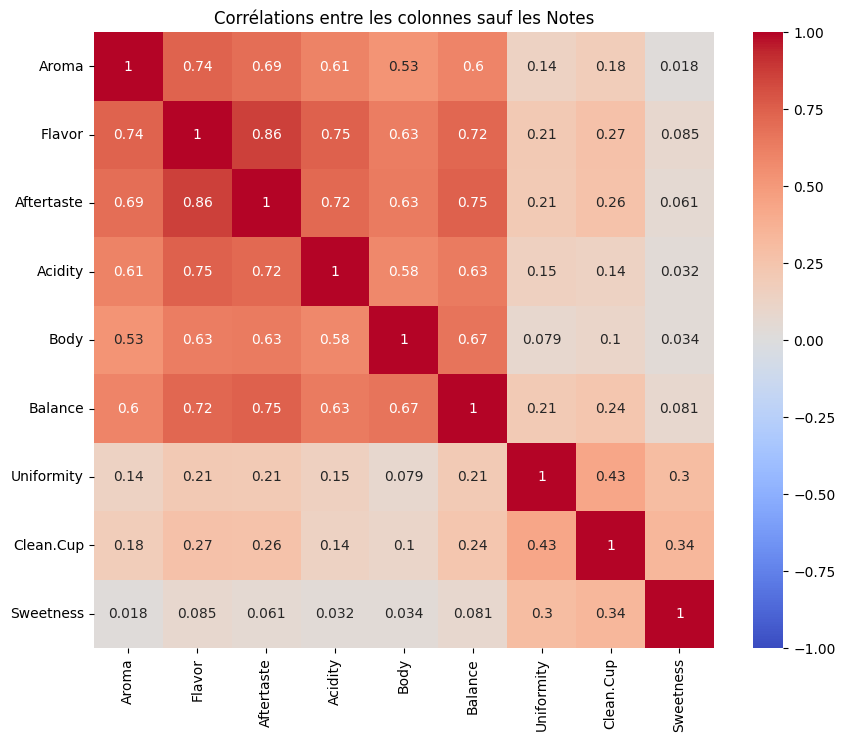

In [ ]:
# Sélection des colonnes de note
columns_of_interest = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']

# Calcul des corrélations
corr_matrix = data[columns_of_interest].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corrélations entre les colonnes sauf les Notes')
plt.show()

So we should drop some features that have too much colinearity between them

Aroma anmd Flavor are hard to distinguish and are correlated, Flavor is the most correlated with all other features, so we will drop it first !

## Basic EDA

In [ ]:
data_cup = data.groupby('Variety')['Total.Cup.Points'].mean()
fig_cup = px.bar(data_cup)
fig_cup.update_layout(
    title='Average Total Cup Points by Variety',
    xaxis_title='Variety',
    yaxis_title='Average Total Cup Points',
    showlegend = False)
fig_cup.add_hline(y=80, line_width=3, line_dash='solid', line_color='red')

## Post-EDA modifications

In [94]:
data = pd.read_csv('./demo_app/src/Coffee_dataset_cleaned_column_and_rows.csv', index_col=0)
data.tail()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1333,1335,Robusta,luis robles,Ecuador,robustasa,robustasa,"san juan, playas",Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,Robusta,Not Specified,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,78.75,0.00,Blue-Green,Specialty Coffee Association,0.0
1334,1336,Robusta,luis robles,Ecuador,robustasa,robustasa,"san juan, playas",Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,Robusta,Not Specified,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green,Specialty Coffee Association,40.0
1335,1337,Robusta,james moore,United States,fazenda cazengo,global opportunity fund,"kwanza norte province, angola",Specialty Coffee Association,2014,"December 23rd, 2014",James Moore,Robusta,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN,Specialty Coffee Association,795.0
1336,1338,Robusta,cafe politico,India,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green,Specialty Coffee Association,0.0
1337,1339,Robusta,cafe politico,Vietnam,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,6.75,6.67,6.50,6.83,6.92,6.83,9.33,9.33,6.67,73.75,0.12,NaN,Specialty Coffee Association,0.0


In [ ]:
data['Processing.Method'].value_counts()

Processing.Method
Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: count, dtype: int64

In [ ]:
data['Processing.Method'] = data['Processing.Method'].replace('Pulped natural / honey', 'Pulped natural / Honey')
data['Processing.Method'].value_counts()

Processing.Method
Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Natural / Experimental        26
Pulped natural / Honey        14
Name: count, dtype: int64

In [ ]:
data['Processing.Method'].isna().sum()

0

In [ ]:
data['Processing.Method'] = data['Processing.Method'].fillna('Not Specified')

In [ ]:
data['altitude_mean_meters'].isna().sum()

0

In [ ]:
data['altitude_mean_meters'] = data['altitude_mean_meters'].fillna(0)

In [ ]:
# data.to_csv('./demo_app/src/Coffee_dataset_cleaned_column_and_rows.csv')

In [11]:
import joblib as jb
agg = jb.load('./demo_app/src/models/agglomerative.pkl')

In [9]:
agg.labels_

array([1, 1, 1, ..., 5, 5, 3], dtype=int64)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import numpy as np

data_agg = data
data_agg.loc[len(data_agg)] = np.nan

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
1334,1336.0,Robusta,luis robles,Ecuador,robustasa,robustasa,"san juan, playas",Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,Robusta,Not Specified,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green,Specialty Coffee Association,40.0
1335,1337.0,Robusta,james moore,United States,fazenda cazengo,global opportunity fund,"kwanza norte province, angola",Specialty Coffee Association,2014,"December 23rd, 2014",James Moore,Robusta,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN,Specialty Coffee Association,795.0
1336,1338.0,Robusta,cafe politico,India,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green,Specialty Coffee Association,0.0
1337,1339.0,Robusta,cafe politico,Vietnam,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,6.75,6.67,6.50,6.83,6.92,6.83,9.33,9.33,6.67,73.75,0.12,NaN,Specialty Coffee Association,0.0
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
numeric_cols_agg = data_agg[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']]  # Profile aromatique

In [100]:
user_input = [[7.75, 7.33, 7.58, 5.08, 7.75]]
# user_input_scaled = scaler_agg.transform(user_input)


In [101]:
user_input[0]

[7.75, 7.33, 7.58, 5.08, 7.75]

In [104]:
numeric_cols_agg.iloc[-1] = user_input[0]

C:\Users\romai\AppData\Local\Temp\ipykernel_29944\1609013054.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
scaler_agg = StandardScaler()
features_scaled_agg = scaler_agg.fit_transform(numeric_cols_agg)
agg = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
agg.fit(features_scaled_agg)
data_agg['ClusterAgg'] = agg.labels_

In [110]:
data_agg['ClusterAgg'].unique()

array([ 0,  3,  2,  9,  1,  4,  5, 10,  6,  7,  8], dtype=int64)

In [112]:
data_agg.tail()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters,ClusterAgg
1334,1336.0,Robusta,luis robles,Ecuador,robustasa,robustasa,"san juan, playas",Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,Robusta,Not Specified,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green,Specialty Coffee Association,40.0,6
1335,1337.0,Robusta,james moore,United States,fazenda cazengo,global opportunity fund,"kwanza norte province, angola",Specialty Coffee Association,2014,"December 23rd, 2014",James Moore,Robusta,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN,Specialty Coffee Association,795.0,5
1336,1338.0,Robusta,cafe politico,India,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green,Specialty Coffee Association,0.0,5
1337,1339.0,Robusta,cafe politico,Vietnam,NaN,cafe politico,NaN,Specialty Coffee Association,2013,"August 25th, 2014",Cafe Politico,Robusta,Natural / Dry,6.75,6.67,6.50,6.83,6.92,6.83,9.33,9.33,6.67,73.75,0.12,NaN,Specialty Coffee Association,0.0,7
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [113]:
user_pred_agg = data_agg['ClusterAgg'].iloc[-1]
user_pred_agg

6

In [126]:
df_coffee_reco_agg = data_agg[data_agg['ClusterAgg'] == user_pred_agg]
df_coffee_reco_agg = df_coffee_reco_agg.iloc[:-1]

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca_agg = pca.fit_transform(features_scaled_agg)
df_final_agg = pd.DataFrame(df_pca_agg)
df_final_agg = df_final_agg.dot(pca.components_.T)
df_final_agg = pd.concat([df_final_agg, data['ClusterAgg']], axis=1)
new_names = {0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4', 4: 'PC5'}
df_final_agg = df_final_agg.rename(columns=new_names)

In [26]:
px.scatter_3d(df_final_agg, x='PC1', y='PC2', z='PC3', color='ClusterAgg')